In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

%store -r X y
X

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,open_acc,revol_bal,pub_rec_bankruptcies,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
5,5000.0,36.0,7.90,156.46,36000.00,734472,11.20,9.0,7963.0,0.0,...,0,0,0,0,0,0,0,0,0,1
17,3600.0,36.0,6.03,109.57,110000.00,734472,10.52,20.0,22836.0,0.0,...,0,0,1,0,0,0,0,0,0,0
19,9200.0,36.0,6.03,280.01,77385.19,734472,9.86,8.0,7314.0,0.0,...,0,0,0,0,0,0,0,0,0,0
30,4375.0,36.0,7.51,136.11,17108.00,734472,20.34,6.0,11210.0,0.0,...,0,0,0,0,0,0,0,0,0,0
31,31825.0,36.0,7.90,995.82,75000.00,734472,14.03,12.0,23151.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42521,3000.0,36.0,7.43,93.23,80000.00,732828,0.39,9.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
42522,2600.0,36.0,8.38,81.94,6500.00,732828,6.46,9.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
42523,1000.0,36.0,7.12,30.94,50000.00,732828,1.10,9.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
42534,6500.0,36.0,8.38,204.84,59000.00,732828,4.00,9.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
##### Funktion scor


def score_print(y,y_pred):
    
    cm = confusion_matrix(y,y_pred)
    print(cm)
    cp= classification_report(y,y_pred)
    print(cp)
    

In [117]:
###### Naiv-estimator


# TODO: Total number of records
n_records = len(X)

# TODO: Number of records where individual's income is more than $50,000
fully_paid = sum(y==1)

# TODO: Number of records where individual's income is at most $50,000
charged_off = n_records - fully_paid

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100 * fully_paid / n_records

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals has paid her credit fully: {}".format(fully_paid))
print ("Individuals hasn't paid her credit: {}".format(charged_off))
print ("Percentage of individuals that paid ther credit: {:.2f}%".format(greater_percent))

Total number of records: 42535
Individuals has paid her credit fully: 0
Individuals hasn't paid her credit: 42535
Percentage of individuals that paid ther credit: 0.00%


In [118]:
#Split into train and test

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25, random_state = 70, stratify= y)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 31901 samples.
Testing set has 10634 samples.


(array([4183., 8054., 6490., 4048., 3296., 2502.,  967., 1379.,  367.,
         615.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

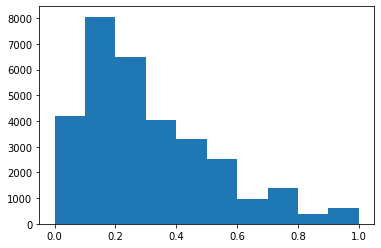

In [145]:
plt.hist(x = X_train["loan_amnt"])

In [129]:
#### skalieren
from sklearn.preprocessing import MinMaxScaler


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',"issue_d","dti","open_acc","revol_bal","pub_rec_bankruptcies" ]
X_train.loc[:,numerical] = scaler.fit_transform(X_train[numerical])
X_test.loc[:,numerical] = scaler.transform(X_test[numerical])



/Users/kli/neuefische/13_Decision_trees/ds-ensemble-methods/.venv/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/kli/neuefische/13_Decision_trees/ds-ensemble-methods/.venv/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


(array([4183., 8054., 6490., 4048., 3296., 2502.,  967., 1379.,  367.,
         615.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

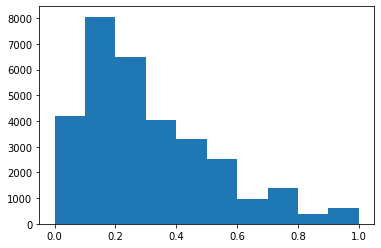

In [149]:
plt.hist(x = scaler.fit_transform(X_train[["loan_amnt"]]))

In [150]:
####fit von log reg

lr = LogisticRegression(max_iter=10000,random_state=70)
lr.fit(X_train, y_train)
lr.score(X_train,y_train)

0.8578727939563023

In [151]:
### predic

y_pred = lr.predict(X_test)

In [152]:
### score für unsere trainingsdaten

score_print(y_train,lr.predict(X_train))

[[7381  256    0    0    0    0    0]
 [ 193 8732  367    0    0    0    0]
 [   3  571 5786  195    0    0    0]
 [   1    0  803 3543  165    0    0]
 [   4    0    0  934 1602    5    0]
 [   0    0    0   15  707  246    8]
 [   0    0    0    0   61  246   77]]
              precision    recall  f1-score   support

           A       0.97      0.97      0.97      7637
           B       0.91      0.94      0.93      9292
           C       0.83      0.88      0.86      6555
           D       0.76      0.79      0.77      4512
           E       0.63      0.63      0.63      2545
           F       0.49      0.25      0.33       976
           G       0.91      0.20      0.33       384

    accuracy                           0.86     31901
   macro avg       0.79      0.67      0.69     31901
weighted avg       0.85      0.86      0.85     31901



In [153]:
#####evu

score_print(y_test,y_pred)

[[2459   87    0    0    0    0    0]
 [  59 2904  134    0    0    0    0]
 [   1  192 1918   74    0    0    0]
 [   3    0  294 1158   49    0    0]
 [   1    0    0  333  512    3    0]
 [   0    0    0    5  246   67    7]
 [   0    0    0    0   19   93   16]]
              precision    recall  f1-score   support

           A       0.97      0.97      0.97      2546
           B       0.91      0.94      0.92      3097
           C       0.82      0.88      0.85      2185
           D       0.74      0.77      0.75      1504
           E       0.62      0.60      0.61       849
           F       0.41      0.21      0.27       325
           G       0.70      0.12      0.21       128

    accuracy                           0.85     10634
   macro avg       0.74      0.64      0.66     10634
weighted avg       0.84      0.85      0.84     10634



In [154]:
######## DecisionTree
dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=70)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
score_print(y_test,y_pred_dtc)

[[2546    0    0    0    0    0    0]
 [   0 3093    4    0    0    0    0]
 [   0    3 2181    0    1    0    0]
 [   0    1   10 1478   15    0    0]
 [   0    1    0    7  835    6    0]
 [   0    0    0    0   15  303    7]
 [   0    0    0    0    0    3  125]]
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2546
           B       1.00      1.00      1.00      3097
           C       0.99      1.00      1.00      2185
           D       1.00      0.98      0.99      1504
           E       0.96      0.98      0.97       849
           F       0.97      0.93      0.95       325
           G       0.95      0.98      0.96       128

    accuracy                           0.99     10634
   macro avg       0.98      0.98      0.98     10634
weighted avg       0.99      0.99      0.99     10634



In [155]:
### score auf unsere trainingdaten


score_print(y_train,dtc.predict(X_train))

[[7636    0    1    0    0    0    0]
 [   0 9289    3    0    0    0    0]
 [   0    7 6546    2    0    0    0]
 [   0    0    3 4445   64    0    0]
 [   0    0    0   16 2522    7    0]
 [   0    0    0    0   25  944    7]
 [   0    0    0    0    0   15  369]]
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      7637
           B       1.00      1.00      1.00      9292
           C       1.00      1.00      1.00      6555
           D       1.00      0.99      0.99      4512
           E       0.97      0.99      0.98      2545
           F       0.98      0.97      0.97       976
           G       0.98      0.96      0.97       384

    accuracy                           1.00     31901
   macro avg       0.99      0.99      0.99     31901
weighted avg       1.00      1.00      1.00     31901



In [156]:
X_train.shape

(31901, 40)

In [157]:
y_train.shape

(31901,)

In [158]:
####LinearSVC

In [159]:
svc= LinearSVC(random_state=70)
svc.fit(X_train,y_train)
y_pred_svc=dtc.predict(X_test)
score_print(y_test,y_pred_svc)

[[2546    0    0    0    0    0    0]
 [   0 3093    4    0    0    0    0]
 [   0    3 2181    0    1    0    0]
 [   0    1   10 1478   15    0    0]
 [   0    1    0    7  835    6    0]
 [   0    0    0    0   15  303    7]
 [   0    0    0    0    0    3  125]]
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2546
           B       1.00      1.00      1.00      3097
           C       0.99      1.00      1.00      2185
           D       1.00      0.98      0.99      1504
           E       0.96      0.98      0.97       849
           F       0.97      0.93      0.95       325
           G       0.95      0.98      0.96       128

    accuracy                           0.99     10634
   macro avg       0.98      0.98      0.98     10634
weighted avg       0.99      0.99      0.99     10634



In [160]:
########## score auf unsere trainingdaten


score_print(y_train,svc.predict(X_train))

[[7572   65    0    0    0    0    0]
 [ 395 8580  316    1    0    0    0]
 [   3 3516 2790  245    1    0    0]
 [   1  407 1675 2148  281    0    0]
 [   4   15  327 1215  984    0    0]
 [   0    0   33  254  632   38   19]
 [   0    0    0   25   95   50  214]]
              precision    recall  f1-score   support

           A       0.95      0.99      0.97      7637
           B       0.68      0.92      0.78      9292
           C       0.54      0.43      0.48      6555
           D       0.55      0.48      0.51      4512
           E       0.49      0.39      0.43      2545
           F       0.43      0.04      0.07       976
           G       0.92      0.56      0.69       384

    accuracy                           0.70     31901
   macro avg       0.65      0.54      0.56     31901
weighted avg       0.68      0.70      0.68     31901



In [161]:
#######   KNeighborsClassifier

In [162]:
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
score_print(y_test,y_pred_knn)

[[1991  503   42   10    0    0    0]
 [ 639 1966  400   63   25    4    0]
 [ 189  954  811  184   43    4    0]
 [  85  351  557  394  108    9    0]
 [  21  139  200  285  179   21    4]
 [   9   44   55   86   96   28    7]
 [   1   14   21   28   38   21    5]]
              precision    recall  f1-score   support

           A       0.68      0.78      0.73      2546
           B       0.50      0.63      0.56      3097
           C       0.39      0.37      0.38      2185
           D       0.38      0.26      0.31      1504
           E       0.37      0.21      0.27       849
           F       0.32      0.09      0.14       325
           G       0.31      0.04      0.07       128

    accuracy                           0.51     10634
   macro avg       0.42      0.34      0.35     10634
weighted avg       0.48      0.51      0.48     10634



In [163]:
########## score auf unsere trainingdaten


score_print(y_train,knn.predict(X_train))

[[6702  822   90   18    4    1    0]
 [1179 7376  609   96   30    1    1]
 [ 347 1969 3859  316   61    3    0]
 [ 162  795 1267 2090  177   17    4]
 [  57  259  498  647 1041   40    3]
 [  15   73  127  253  286  214    8]
 [   9   38   61   70  109   51   46]]
              precision    recall  f1-score   support

           A       0.79      0.88      0.83      7637
           B       0.65      0.79      0.72      9292
           C       0.59      0.59      0.59      6555
           D       0.60      0.46      0.52      4512
           E       0.61      0.41      0.49      2545
           F       0.65      0.22      0.33       976
           G       0.74      0.12      0.21       384

    accuracy                           0.67     31901
   macro avg       0.66      0.50      0.53     31901
weighted avg       0.66      0.67      0.65     31901



In [164]:
###### svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred_clf=clf.predict(X_test)
score_print(y_test,y_pred_clf)

[[2447   99    0    0    0    0    0]
 [  51 2871  175    0    0    0    0]
 [   1  139 1918  127    0    0    0]
 [   3    0  196 1239   66    0    0]
 [   1    0    0  263  579    6    0]
 [   0    0    0    1  229   94    1]
 [   0    0    0    0   18  104    6]]
              precision    recall  f1-score   support

           A       0.98      0.96      0.97      2546
           B       0.92      0.93      0.93      3097
           C       0.84      0.88      0.86      2185
           D       0.76      0.82      0.79      1504
           E       0.65      0.68      0.67       849
           F       0.46      0.29      0.36       325
           G       0.86      0.05      0.09       128

    accuracy                           0.86     10634
   macro avg       0.78      0.66      0.66     10634
weighted avg       0.86      0.86      0.85     10634



In [165]:
########## score auf unsere trainingdaten


score_print(y_train,clf.predict(X_train))

[[7418  219    0    0    0    0    0]
 [ 133 8744  415    0    0    0    0]
 [   3  280 5986  286    0    0    0]
 [   1    0  447 3928  136    0    0]
 [   4    0    0  587 1948    6    0]
 [   0    0    0    0  581  394    1]
 [   0    0    0    0   55  274   55]]
              precision    recall  f1-score   support

           A       0.98      0.97      0.98      7637
           B       0.95      0.94      0.94      9292
           C       0.87      0.91      0.89      6555
           D       0.82      0.87      0.84      4512
           E       0.72      0.77      0.74      2545
           F       0.58      0.40      0.48       976
           G       0.98      0.14      0.25       384

    accuracy                           0.89     31901
   macro avg       0.84      0.72      0.73     31901
weighted avg       0.89      0.89      0.89     31901



In [166]:
##### RandomForestClassifier

rfc= RandomForestClassifier(max_depth=5,min_samples_split=20)
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
score_print(y_test,y_pred_rfc)

[[2494   52    0    0    0    0    0]
 [  76 3021    0    0    0    0    0]
 [   1 1053 1121    6    4    0    0]
 [   3  854  426  181   40    0    0]
 [   1  315  316  102  115    0    0]
 [   0   87  129   38   71    0    0]
 [   0   18   57   20   33    0    0]]
              precision    recall  f1-score   support

           A       0.97      0.98      0.97      2546
           B       0.56      0.98      0.71      3097
           C       0.55      0.51      0.53      2185
           D       0.52      0.12      0.20      1504
           E       0.44      0.14      0.21       849
           F       0.00      0.00      0.00       325
           G       0.00      0.00      0.00       128

    accuracy                           0.65     10634
   macro avg       0.43      0.39      0.37     10634
weighted avg       0.62      0.65      0.59     10634

/Users/kli/neuefische/13_Decision_trees/ds-ensemble-methods/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: U

In [167]:
########## score auf unsere trainingdaten


score_print(y_train,rfc.predict(X_train))

[[7474  163    0    0    0    0    0]
 [ 251 9041    0    0    0    0    0]
 [   3 3141 3374   31    6    0    0]
 [   1 2418 1439  525  129    0    0]
 [   4  941  893  333  374    0    0]
 [   0  258  350  142  226    0    0]
 [   0   83  161   55   85    0    0]]
/Users/kli/neuefische/13_Decision_trees/ds-ensemble-methods/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
              precision    recall  f1-score   support

           A       0.97      0.98      0.97      7637
           B       0.56      0.97      0.71      9292
           C       0.54      0.51      0.53      6555
           D       0.48      0.12      0.19      4512
           E       0.46      0.15      0.22      2545
           F       0.00      0.00      0.0

In [168]:
%store X_train X_test y_test y_train score_print

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_test' (Series)
Stored 'y_train' (Series)
Proper storage of interactively declared classes (or instances
of those classes) is not possible! Only instances
of classes in real modules on file system can be %store'd.

